## Overview

This example uses micronet to create a simple binary classifier from the scikit learn moons dataset.

In [246]:
import numpy as np
from matplotlib import pyplot as plt

from micronet import MLP, Layer
from micronet.activations import relu, softmax
from micronet.losses import cross_entropy

## Create Dataset

We begin by creating the dataset using scikit learn. We will also plot it then convert the outputs from integer to one-hot encoding for training the network.

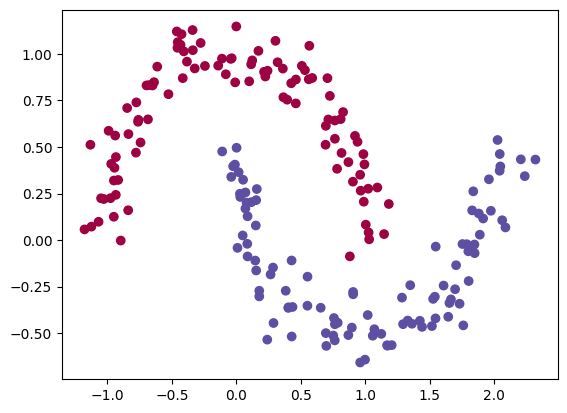

In [247]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=200, noise=0.1)

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Spectral)

In [248]:
# create one-hot encoding of y
x_train, y_train = x[:50], np.eye(2)[y[:50]]
x_test, y_test = x[150:], np.eye(2)[y[150:]]

## Create Model

We will create our model with an input layer of size 2, two hidden layers of size 32 with the relu activation function, and an output layer of size 2 with the softmax activation function.

In [249]:
model = MLP([
    Layer(2, 32, relu),
    Layer(32, 32, relu),
    Layer(32, 2, softmax),
])

## Train Model

We will now train the model off the dataset with the cross entropy loss function.

In [250]:

model.train(x_train, y_train, loss=cross_entropy, epochs=20, batch_size=16, learning_rate=0.2);

Epoch 0: Avg Loss 2.1351342336691195
Epoch 1: Avg Loss 0.2635242153958236
Epoch 2: Avg Loss 0.06630416667211915
Epoch 3: Avg Loss 0.04024927294601099
Epoch 4: Avg Loss 0.027325172145290396
Epoch 5: Avg Loss 0.014686962734511965
Epoch 6: Avg Loss 0.006062429671765687
Epoch 7: Avg Loss 0.004070582014712829
Epoch 8: Avg Loss 0.00334090779680947
Epoch 9: Avg Loss 0.0028542049123952374
Epoch 10: Avg Loss 0.0025501157612974625
Epoch 11: Avg Loss 0.002283429898517477
Epoch 12: Avg Loss 0.0020748933032744598
Epoch 13: Avg Loss 0.0019081280630901362
Epoch 14: Avg Loss 0.0017635032534746191
Epoch 15: Avg Loss 0.0016431290711094544
Epoch 16: Avg Loss 0.0015340497389193337
Epoch 17: Avg Loss 0.0014394508538441782
Epoch 18: Avg Loss 0.0013553909946811273
Epoch 19: Avg Loss 0.0012878346039381851


## Evaluate Model

Now that we have trained our model, we can use it to generate predictions. We will compare the actual and predicted classifications for the first few samples in our test dataset.

In [251]:
y_pred = list(map(model, x_test))
for actual, predicted in zip(y_test[:10 ], y_pred[:10]):
    print(f"Actual: {actual}, Predicted: {predicted.round(3)}")

Actual: [0. 1.], Predicted: [0. 1.]
Actual: [1. 0.], Predicted: [1. 0.]
Actual: [0. 1.], Predicted: [0. 1.]
Actual: [1. 0.], Predicted: [1. 0.]
Actual: [0. 1.], Predicted: [0.066 0.934]
Actual: [1. 0.], Predicted: [1. 0.]
Actual: [1. 0.], Predicted: [0.997 0.003]
Actual: [1. 0.], Predicted: [1. 0.]
Actual: [1. 0.], Predicted: [1. 0.]
Actual: [0. 1.], Predicted: [0.103 0.897]


We can also calculate what percent of samples in the test dataset got classified correctly by our model.

In [252]:
# get accuracy of y_test and y_pred
accuracy = np.mean(np.argmax(y_test, axis=1) == np.argmax(y_pred, axis=1))
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


And for fun, we can generate a grid of points over the domain of our samples, and see the model's estimates and confidence over the entire domain.

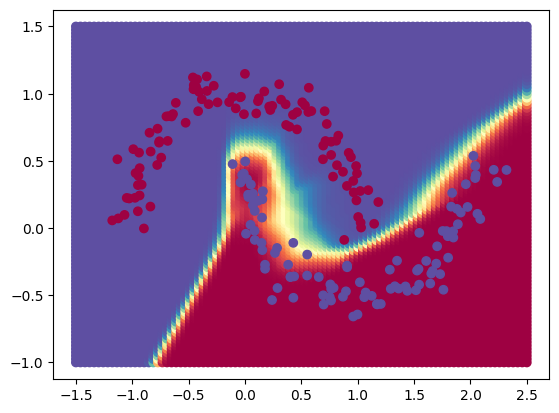

In [253]:
# condense the code above
points = np.array([[x, y] for x in np.linspace(-1.5, 2.5, 100) for y in np.linspace(-1, 1.5, 100)])
values = np.array([model(point) for point in points])

plt.scatter(points[:, 0], points[:, 1], c=values[:,0], cmap=plt.cm.Spectral)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Spectral)